## Regression

Dataset: Boston house prices dataset (https://scikit-learn.org/stable/datasets/index.html)


Tasks: Set 1

Implement least-squares (LS) regression -- 5 pts
Carry out LS regression on the house prices dataset using 5-fold cross validation and report the average prediction error -- 10pts
Provide a plot of "Measured versus Predicted" values and overlay on top of this a line with slope 1 -- 5 pts


Tasks: Set 2

Implement ridge regression -- 5 pts
Carry out ridge regression on the house prices dataset by learning lambda using 5-fold cross validation, where one of the folds is reserved for final testing, and report the average prediction error -- 15

Importing Boston House Prices Dataset and creating augmented data matrix by adding a row to feature matrix of value 1 to each data sample

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.datasets import load_boston
data, house_prices = load_boston(return_X_y=True)

n = len(data)
m = len(data[0])

features = np.ones((n,m+1))
features[:,0:13] = data

Splitting the data for cross validation, 

In [2]:
#Splits
k = 5

data_splits = np.zeros((k), dtype=object)
price_splits = np.zeros((k), dtype=object)

data_splits[0] = np.array(features[:int(n/k)])
price_splits[0] = np.array(house_prices[:int(n/k)])

for i in range(1,k):
    data_splits[i] = np.array(features[int((i*n)/k): int((i+1)*n/k)])
    price_splits[i] = np.array(house_prices[int((i*n)/k): int((i+1)*n/k)])

Defining functions for least squares, ridge regression, and cross validation. Least squares and ridge regression use the closed form solution.

In [3]:
def least_squares(x, y, test_data):
    w_tilda = np.linalg.inv(x.T @ x)@ x.T @ y
    return test_data @ w_tilda

def ridge_regression(x, y, test_data, _lambda):
    w_tilda = np.linalg.inv((x.T @ x)+ _lambda*np.identity(m+1))@ x.T @ y
    return test_data @ w_tilda

def cross_validation(k, split_data, split_labels, classifier_func, regulator = 0, regression_plots = False):
    regression_error = np.zeros((k)) #Array to hold regression error of each fold
    
    for i in range(k):
        #Seperating split data into training and test sets (4 splits for training, 1 for testing)
        training = np.concatenate(np.delete(split_data, i))
        train_labels = np.concatenate(np.delete(split_labels, i))
        
        test = split_data[i]
        test_labels = split_labels[i]
        
        #Obtaining regression values
        if classifier_func == least_squares:
            classifier_values = classifier_func(training, train_labels, test)
        elif classifier_func == ridge_regression:
            classifier_values = classifier_func(training, train_labels, test, regulator)
        
        #Plots for regression
        if regression_plots:
            plt.scatter(test_labels, classifier_values, c="blue")
            x = np.linspace(0, np.max(house_prices), 1000)
            plt.plot(x, x, c="black")
            plt.xlabel("Measured")
            plt.ylabel("Predicted")
            plt.title("Measured vs Predicted Median value of owner-occupied homes in $1000s")
            plt.plot()
        
        #Calculating classification rate: (# of correctly classified test samples)/(total number of test samples)
        regression_error[i] = sum(np.square(test_labels-classifier_values))/len(classifier_values)
         
    #Returning the mean and variance of the classification rates
    return np.mean(regression_error), np.var(regression_error)

Performing 5-fold cross validation on the dataset and plotting the results of each classifier on each of the test sets. Also calculating the average regression error using the sum of residual squares error divided by the number of total number of data samples tested.

Average regression error using least squares:  37.125390481938354


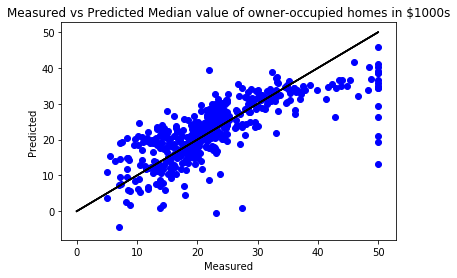

In [4]:
ls_mean, ls_var = cross_validation(5, data_splits, price_splits, least_squares, 0, regression_plots = True)

print("Average regression error using least squares: ", ls_mean)

Ridge Regression: Finding the best lambda value using 4 splits, 3 for training and 1 for testing. One set will be left out for validation of the final classifier using the lambda value found.

In [5]:
lambda_values = np.array([1, 3, 5, 10, 30, 50]) #Lambda values to be tested and to find the best one 
lambda_average_error = np.zeros((len(lambda_values))) #Average error for each lambda value

ridge_regression_dataset = np.delete(data_splits,0) #4 data splits for testing lambda
ridge_regression_priceset = np.delete(price_splits,0) #4 label(price) splits for testing lambda

validation_dataset = data_splits[0]  #Leftover dataset for validation
validation_priceset = price_splits[0] #Leftover price set for validation

for i in range(len(lambda_values)):
    rr_mean, rr_var = cross_validation(4, ridge_regression_dataset, ridge_regression_priceset, ridge_regression, lambda_values[i])
    lambda_average_error[i] = rr_mean
    print("Average regression error using ridge regression, lamdba = ",lambda_values[i],": ", rr_mean)
    print()
    
best_lambda = lambda_values[int(np.argmin(lambda_average_error))]
print("The best lambda value is:", best_lambda)

Average regression error using ridge regression, lamdba =  1 :  40.48947117894346

Average regression error using ridge regression, lamdba =  3 :  40.274400310182266

Average regression error using ridge regression, lamdba =  5 :  40.16112498332735

Average regression error using ridge regression, lamdba =  10 :  40.04274591013128

Average regression error using ridge regression, lamdba =  30 :  40.651451141556734

Average regression error using ridge regression, lamdba =  50 :  42.05970422347459

The best lambda value is: 10


The best lambda value that was found was 10, therefore we will use it to train the final classifier with 4 of the splits.

In [6]:
rr_mean, rr_var = cross_validation(5, data_splits, price_splits, ridge_regression, best_lambda)
print("Average regression error using ridge regression, lamdba = ",best_lambda,": ", rr_mean)

Average regression error using ridge regression, lamdba =  10 :  32.517177697956924
